## <center>Near Infrared and Hyperspectral Imaging in tandem with Machine Learning for Fraud Detection in Coffee</center> 

### <left> 1. Research Outlook </left>

<div style="text-align: justify;">
    Food fraud is an increasingly pressing concern, affecting both consumer confidence and the integrity of global markets. Coffee, one of the world’s most consumed beverages, is particularly vulnerable to adulteration, where cheaper, inferior substances are blended with authentic products. This project will explore the use of Near-Infrared Hyperspectral Imaging (NIR-HSI) combined with `Machine Learning (ML) techniques to detect coffee adulteration. NIR-HSI captures detailed spectral and spatial data across a wide range of wavelengths, revealing subtle chemical and physical differences. The aim is to explore the potential of combining this technology with chemometrics and machine learning to detect fraud in both ground and freeze-dried instant Arabica coffee adulterated with Robusta. 
</div>

   
<div style="text-align: justify;">   
    The collected data will undergo preprocessing, followed by Principal Component Analysis (PCA) for dimensionality reduction. Supervised and unsupervised classification techniques will then be employed to classify samples based on their authenticity, while regression models will be used to quantify the degree of adulteration. This combined approach seeks to develop a reliable, scientific framework for detecting fraud in processed coffee, contributing to improved transparency and quality assurance in the coffee industry.    
</div>

### <left> 2. Data </left>

A total of `30 coffee samples` were purchased from different countries, all of which are major coffee producers. This included `25 Arabica` and `5 Robusta` samples. The beans were roasted to a medium roast for 15 minutes at 220°C. After roasting, the coffee was cooled overnight and then ground into a fine powder for analysis.

The adulteration study involved mixing `16 Arabica samples` with `3 distinct Robusta samples` to create the `training set`, while the remaining `9 Arabica samples` were mixed with `2 Robusta samples` to form the `test set`. Adulteration levels were set at 0%, 1%, 5%, 10%, 20%, 40%, 60%, 80%, and 100% to simulate different levels of fraud. The samples were subsequently analysed by Hyperspectral Imaging (HSI) in triplicate. 

### <left> 3. Data Cleaning</left>

In [1]:
# Load packages 
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set the working directory  

# Change working directory
os.chdir('C:\\Users\\abc\\OneDrive - UGent\\Documenten\\Derick Malavi_PhD Docs_UGent\\Manuscript 4_Coffee')

In [3]:
# Load the hyperspectral imaging data 
data = 'gr_coffee_compiled_final.csv'
coffee_data = pd.read_csv(data)

In [4]:
# Check the number of rows and columns 
coffee_data.shape

(1469, 229)

In [5]:
# Check whether it is a data frame
type(coffee_data)

pandas.core.frame.DataFrame

In [6]:
#Check the first five rows of the data 
coffee_data.head(10)

,sample_id,binary_class,three_class,adult_percent,cal_val,935.609985,939.059998,942.52002,945.97998,949.429993,...,1688.02002,1691.589966,1695.170044,1698.75,1702.329956,1705.910034,1709.48999,1713.069946,1716.650024,1720.22998
0,Pure_Arabica_10,pure_arabica,pure_arabica,0,1,0.347876,0.349376,0.363904,0.375547,0.384829,...,0.520932,0.512153,0.502902,0.492153,0.481531,0.470791,0.460815,0.450851,0.441252,0.430884
1,Pure_Arabica_10,pure_arabica,pure_arabica,0,1,0.354493,0.356088,0.370770,0.383244,0.392871,...,0.538519,0.529235,0.519369,0.507977,0.496291,0.484611,0.474018,0.463448,0.453496,0.442699
2,Pure_Arabica_10,pure_arabica,pure_arabica,0,1,0.354535,0.355939,0.369164,0.381018,0.390254,...,0.526004,0.517599,0.508718,0.498563,0.488669,0.477716,0.468176,0.458365,0.449139,0.438817
3,Pure_Arabica_11,pure_arabica,pure_arabica,0,1,0.385204,0.386921,0.403007,0.417125,0.427858,...,0.509195,0.500269,0.491201,0.480669,0.470067,0.459323,0.450146,0.440196,0.431138,0.422071
4,Pure_Arabica_11,pure_arabica,pure_arabica,0,1,0.386532,0.388493,0.405747,0.420264,0.431064,...,0.514631,0.505646,0.496142,0.485134,0.474126,0.462916,0.452956,0.443584,0.434769,0.425078
5,Pure_Arabica_11,pure_arabica,pure_arabica,0,1,0.379677,0.381715,0.400566,0.415940,0.427600,...,0.509057,0.500061,0.490770,0.480227,0.469570,0.458570,0.449189,0.439426,0.430411,0.420982
6,Pure_Arabica_12,pure_arabica,pure_arabica,0,1,0.435689,0.438137,0.458295,0.476008,0.488496,...,0.515575,0.507542,0.499290,0.489975,0.480546,0.470744,0.461748,0.453272,0.445369,0.435919
7,Pure_Arabica_12,pure_arabica,pure_arabica,0,1,0.440689,0.443175,0.463120,0.481150,0.493668,...,0.520659,0.512539,0.503935,0.494303,0.484507,0.474463,0.466062,0.457025,0.448042,0.439543
8,Pure_Arabica_12,pure_arabica,pure_arabica,0,1,0.437546,0.440136,0.461143,0.478387,0.490821,...,0.518292,0.510039,0.501318,0.491571,0.481666,0.471160,0.462432,0.453640,0.444779,0.435972
9,Pure_Arabica_13,pure_arabica,pure_arabica,0,1,0.403580,0.405651,0.423142,0.438519,0.449996,...,0.515486,0.506540,0.497462,0.487131,0.476768,0.465737,0.456811,0.447592,0.438564,0.429128


In [7]:
# Check for any missing values
coffee_data.isnull().sum().any()

False

In [8]:
# Sort/Arrange the data frame based on the percent adulteration column

coffee_data = coffee_data.sort_values(by = ['adult_percent'], ascending=True)
coffee_data_save = coffee_data # To be saved for further analysis

In [9]:
# The values have to be between 0 and 1. Let us check if there any extreme values beyond our max values

min_value = coffee_data.iloc[:, 5:226].min().min()  # Overall min value
max_value = coffee_data.iloc[:, 5:226].max().max()  # Overall max value

print(f'The minimum value is {min_value} and the maximum value is {max_value}')

The minimum value is 0.248572 and the maximum value is 0.737226


In [10]:
coffee_data.head(10)

,sample_id,binary_class,three_class,adult_percent,cal_val,935.609985,939.059998,942.52002,945.97998,949.429993,...,1688.02002,1691.589966,1695.170044,1698.75,1702.329956,1705.910034,1709.48999,1713.069946,1716.650024,1720.22998
0,Pure_Arabica_10,pure_arabica,pure_arabica,0,1,0.347876,0.349376,0.363904,0.375547,0.384829,...,0.520932,0.512153,0.502902,0.492153,0.481531,0.470791,0.460815,0.450851,0.441252,0.430884
54,Pure_Arabica_3,pure_arabica,pure_arabica,0,1,0.332850,0.334093,0.346032,0.356395,0.364701,...,0.529074,0.519696,0.509692,0.497895,0.486415,0.474300,0.463489,0.452816,0.442621,0.432088
53,Pure_Arabica_2,pure_arabica,pure_arabica,0,1,0.347639,0.349199,0.363783,0.375387,0.384600,...,0.536934,0.527794,0.518312,0.507230,0.496132,0.484015,0.474116,0.463680,0.453512,0.442852
52,Pure_Arabica_2,pure_arabica,pure_arabica,0,1,0.338413,0.339599,0.350815,0.362448,0.370806,...,0.519080,0.510286,0.500799,0.489834,0.479003,0.467816,0.457893,0.447762,0.437734,0.427460
51,Pure_Arabica_2,pure_arabica,pure_arabica,0,1,0.343888,0.345065,0.357601,0.368907,0.377726,...,0.528300,0.519557,0.510316,0.499657,0.489016,0.477639,0.467895,0.458040,0.447648,0.436710
50,Pure_Arabica_25,pure_arabica,pure_arabica,0,2,0.334076,0.335419,0.348346,0.360695,0.369975,...,0.525542,0.516024,0.506066,0.494694,0.482859,0.470697,0.460043,0.449471,0.439155,0.428964
49,Pure_Arabica_25,pure_arabica,pure_arabica,0,2,0.336468,0.337828,0.351096,0.362560,0.371364,...,0.526165,0.516891,0.506997,0.495679,0.483980,0.472362,0.462169,0.451610,0.441280,0.430809
48,Pure_Arabica_25,pure_arabica,pure_arabica,0,2,0.334080,0.335349,0.347662,0.359840,0.368746,...,0.525403,0.515874,0.506118,0.494641,0.482859,0.470629,0.460219,0.449956,0.439741,0.428859
47,Pure_Arabica_24,pure_arabica,pure_arabica,0,2,0.343569,0.344847,0.357006,0.367305,0.375967,...,0.530095,0.520728,0.510819,0.499798,0.488136,0.476272,0.466205,0.456032,0.446100,0.435787
46,Pure_Arabica_24,pure_arabica,pure_arabica,0,2,0.342920,0.344168,0.356570,0.367652,0.376494,...,0.531540,0.522283,0.512748,0.501370,0.490076,0.478498,0.468091,0.457653,0.448301,0.437503


In [11]:
# Check the number of samples for the classes

binary_class = coffee_data.groupby('binary_class')['binary_class'].count()
print(binary_class)

binary_class
adulterated     1394
pure_arabica      75
Name: binary_class, dtype: int64


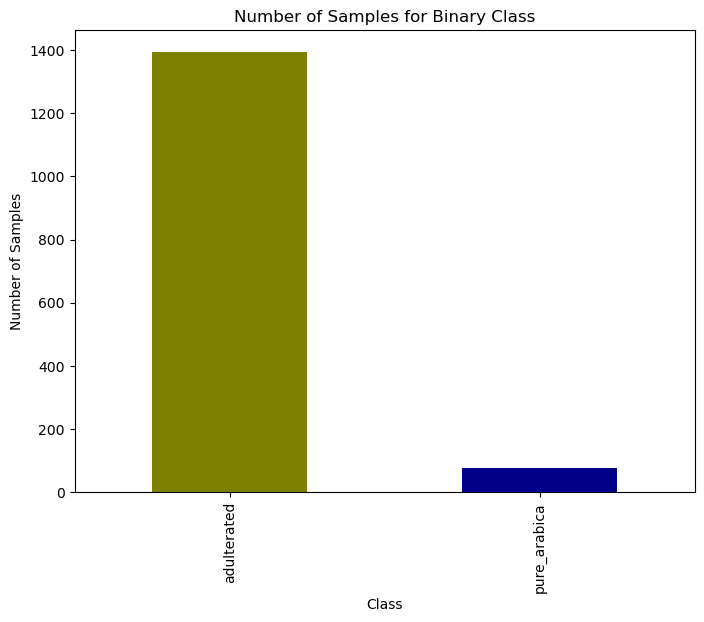

In [12]:
# Plotting bar graph
plt.figure(figsize=(8,6))  
binary_class.plot(kind='bar', color=['olive', 'darkblue'])

# Add labels and title
plt.title('Number of Samples for Binary Class', fontsize=12, loc='center')
plt.xlabel('Class', fontsize=10, loc='center')
plt.ylabel('Number of Samples', fontsize=10, loc='center')

# Display the plot
plt.show()

- The two classes are `highly imbalanced`. We will have to `balance the dataeset` when training the classifcation models. Techniques such as `SMOTE` will be evaluated.

In [13]:
# Let us also check the three classes 
three_class = coffee_data.groupby('three_class')['three_class'].count()
print(three_class)

three_class
adulterated     1379
pure_arabica      75
pure_robusta      15
Name: three_class, dtype: int64


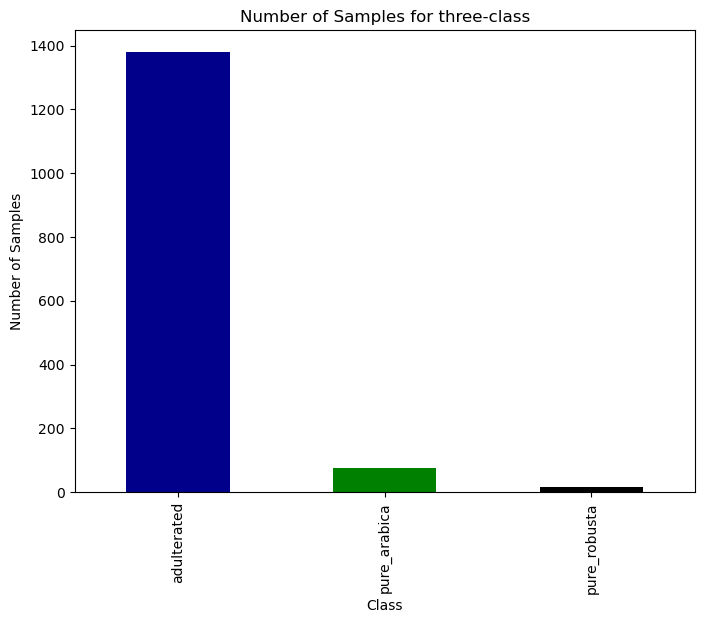

In [14]:
# Plotting 
plt.figure(figsize=(8,6))  
three_class.plot(kind='bar', color=['darkblue', 'green', 'black'])

# Add labels and title
plt.title('Number of Samples for three-class', fontsize=12, loc='center')
plt.xlabel('Class', fontsize=10, loc='center')
plt.ylabel('Number of Samples', fontsize=10, loc='center')

# Display the plot
plt.show()

In [15]:
# Check the number of samples for trainng/cross-validation and testing models
calibration = coffee_data[coffee_data['cal_val'] == 1]['cal_val'].count()
external_validation = coffee_data[coffee_data['cal_val'] == 2]['cal_val'].count()
percent_calibration = round((calibration/(calibration + external_validation))*100,2)
percent_validation = round((external_validation/(calibration + external_validation))*100,2)

print(f'The number of samples for training models will be {calibration} samples or {percent_calibration}%, while those for testing the models will be {external_validation} samples or {percent_validation}%.')

The number of samples for training models will be 1055 samples or 71.82%, while those for testing the models will be 414 samples or 28.18%.


In [16]:
spectral_columns = coffee_data.iloc[:,5:226]
spectral_columns.head()

,935.609985,939.059998,942.52002,945.97998,949.429993,952.890015,956.349976,959.809998,963.27002,966.72998,...,1677.290039,1680.869995,1684.439941,1688.02002,1691.589966,1695.170044,1698.75,1702.329956,1705.910034,1709.48999
0,0.347876,0.349376,0.363904,0.375547,0.384829,0.392920,0.398859,0.403592,0.408170,0.412234,...,0.540370,0.534548,0.528452,0.520932,0.512153,0.502902,0.492153,0.481531,0.470791,0.460815
54,0.332850,0.334093,0.346032,0.356395,0.364701,0.372712,0.378541,0.383322,0.387886,0.391924,...,0.549397,0.543420,0.537078,0.529074,0.519696,0.509692,0.497895,0.486415,0.474300,0.463489
53,0.347639,0.349199,0.363783,0.375387,0.384600,0.393099,0.399060,0.403932,0.408625,0.412801,...,0.556898,0.551009,0.544889,0.536934,0.527794,0.518312,0.507230,0.496132,0.484015,0.474116
52,0.338413,0.339599,0.350815,0.362448,0.370806,0.378820,0.384661,0.389287,0.393878,0.397977,...,0.538597,0.532848,0.526814,0.519080,0.510286,0.500799,0.489834,0.479003,0.467816,0.457893
51,0.343888,0.345065,0.357601,0.368907,0.377726,0.385786,0.391651,0.396440,0.401120,0.405245,...,0.547756,0.541903,0.535955,0.528300,0.519557,0.510316,0.499657,0.489016,0.477639,0.467895


### <left> 4. Plotting the Spectra </left>

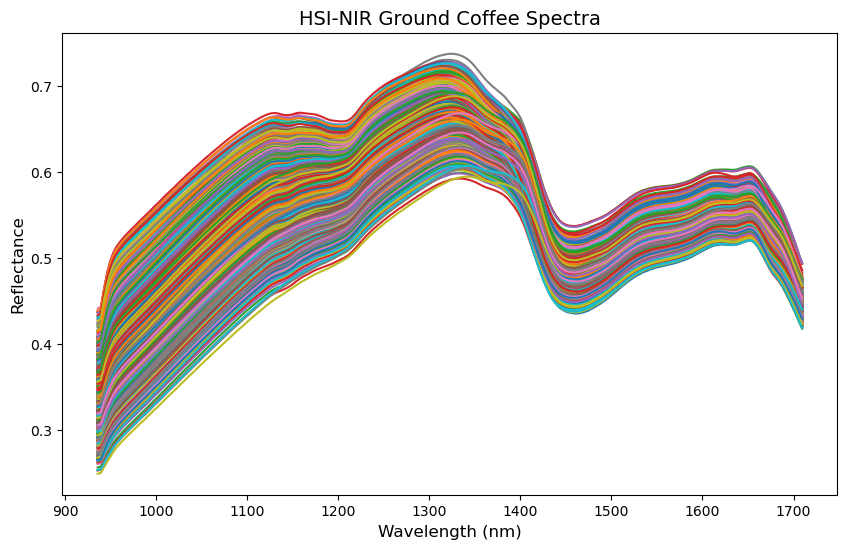

In [17]:
# It is critical to visualize the spectra. We can first plot 'blindly' without the class labels

# Get the wavelengths from the column names 

wavelengths = spectral_columns.columns.astype(float)

# Plot the spectral data
plt.figure(figsize=(10, 6))

# Iterate through each row in the spectral data and plot the spectrum
for index, row in spectral_columns.iterrows():
    plt.plot(wavelengths, row, label=f'Sample {index}')
    
# Add title and labels
plt.title('HSI-NIR Ground Coffee Spectra', fontsize=14)
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
    
# Show the plot
plt.show()

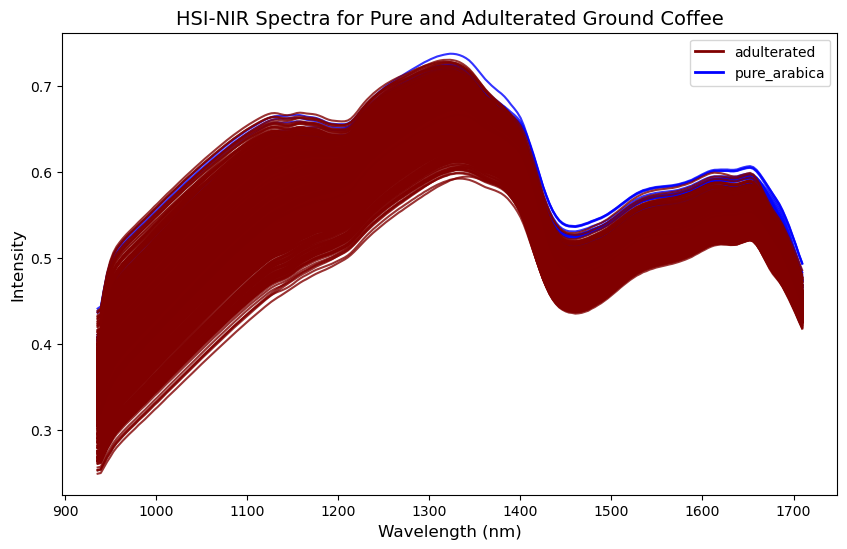

In [18]:
# Spectra plot based on binary classification: pure vs adulterated coffee

# Define the binary class
binary_class = coffee_data['binary_class']

# Extract the spectral wavelengths 
wavelengths = spectral_columns.columns.astype(float)

# Define the color pallete 
palette = {"adulterated": "maroon", "pure_arabica": "blue"}

# Plot the spectral data with colors based on the binary_class
plt.figure(figsize=(10, 6))

# Iterate over each row and plot, using the binary_class to color each sample
for index, row in spectral_columns.iterrows():
    class_label = binary_class.iloc[index]
    plt.plot(wavelengths, row, color=palette[class_label], label=class_label if index == 0 else "", alpha=0.8)

# Add title and labels
plt.title('HSI-NIR Spectra for Pure and Adulterated Ground Coffee', fontsize=14)
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Intensity', fontsize=12)

# Add legend
handles = [plt.Line2D([0], [0], color=palette[class_label], lw=2) for class_label in palette]
labels = palette.keys()
plt.legend(handles, labels, loc='upper right')

# Show the plot
plt.show()

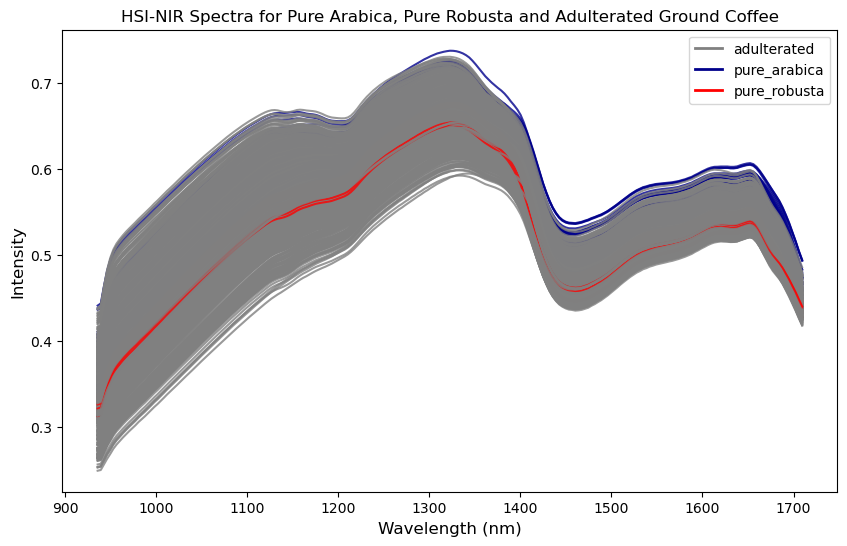

In [19]:
# Spectra plot based on three classes: pure arabica, pure robusta and adulterated coffee (arabica+robusta)

# Define the three classes
three_class = coffee_data['three_class']

# Extract the spectral wavelengths 
wavelengths = spectral_columns.columns.astype(float)

# Define the color pallete 
palette = {"adulterated": "grey", "pure_arabica": "darkblue", "pure_robusta": "red"}

# Plot the spectral data with colors based on the three_class
plt.figure(figsize=(10, 6))

# Iterate over each row and plot, using the three_class to color each sample
for index, row in spectral_columns.iterrows():
    class_label = three_class.iloc[index]
    plt.plot(wavelengths, row, color=palette[class_label], label=class_label if index == 0 else "", alpha=0.8)

# Add title and labels
plt.title('HSI-NIR Spectra for Pure Arabica, Pure Robusta and Adulterated Ground Coffee', fontsize=12)
plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Intensity', fontsize=12)

# Add legend
handles = [plt.Line2D([0], [0], color=palette[class_label], lw=2) for class_label in palette]
labels = palette.keys()
plt.legend(handles, labels, loc='upper right')

# Show the plot
plt.show()

In [20]:
# Save our clean file for further analysis

coffee_data_save.to_csv("coffee_data_pycleaned.csv", index = False)

### Next analysis

- The data will be preprocessed using several methods and subjected to `PCA` for dimensionality reduction, followed by both `supervised` and `unsupervised classification`. `Regression models` will also be explored. The research will also explore different `variable reduction` algorithms and their impact on model performance. 